In [1]:
%matplotlib inline
import os
import sys
from ray.tune import Analysis

import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

__file__ = globals()['_dh'][0]

# get an absolute path to the directory that contains parent files
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TRAIN_RESULTS_PATH
%matplotlib inline

In [2]:
series = 66
type_env = 'sim-edge'
dataset_id = 6
workload_id = 0
trace_id = 2
network_id = 1


experiments_info = [
    {
        'legend': 'PG',
        'experiment_id': 0,
        'algorithm': 'PG',
        'trial': 'PG_SimEdgeEnv_41ad1_00001_1_penalty_latency=4_2021-12-13_15-35-27'},
    {
        'legend': 'PPO',
        'experiment_id': 3,
        'algorithm': 'PPO',
        'trial': 'PPO_SimEdgeEnv_3c048_00001_1_penalty_latency=4_2021-12-13_22-23-28'},
    {
        'legend': 'IMPALA',
        'experiment_id': 4,
        'algorithm': 'IMPALA',
        'trial': 'IMPALA_SimEdgeEnv_f9697_00001_1_penalty_latency=4_2021-12-14_00-44-46'}]

In [5]:
def load_experiments(legend, experiment_id, algorithm, trial):
    experiment_folder_path = os.path.join(
        TRAIN_RESULTS_PATH,
        "series",      str(series),
        "envs",        str(type_env),
        "datasets",    str(dataset_id),
        "workloads",   str(workload_id),
        "networks",    str(network_id),
        "traces",      str(trace_id),
        "experiments", str(experiment_id),
        str(algorithm), trial)
    analysis = Analysis(experiment_folder_path)
    df = analysis.trial_dataframes[experiment_folder_path]
    with open(
        os.path.join(
            experiment_folder_path, 'result.json'), 'r') as f:
        result = f.read().split('\n')
    episodes_reward = pd.DataFrame({'timestep':[], 'reward':[]})
    # for line, iteration in enumerate(result):
    #     if line:
    #         episodes_reward.update({iteration:
    #             json.loads(line)[
    #                 'hist_stats']['episode_reward']})
    # load the json file TODO
    # selected_stats = ['episode_reward_mean', 'episodes_this_iter',
    #                 'timesteps_total',
    #                 'custom_metrics/num_moves_mean',
    #                 'custom_metrics/users_distances_mean',
    #                 'custom_metrics/num_consolidated_mean',
    #                 'custom_metrics/num_overloaded_mean']
    # df_selected = df[selected_stats]
    a = 1
    return legend, df, episodes_reward


In [6]:
experiments = {}
episodes_rewards = []
for experiment_info in experiments_info:
    legend, df_selected, episodes_reward = load_experiments(**experiment_info)
    experiments[legend] = df_selected
    episodes_rewards.append(episodes_reward)

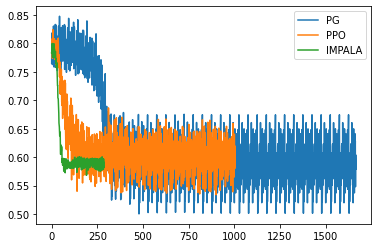

In [7]:
for label, dataframe in experiments.items():
    plt.plot(dataframe['custom_metrics/users_distances_mean'], label=label)
    plt.legend()
    # print(f"test_types: {row['test_types']}")
    # print(f"sample episdoe users distances: {row['sample_episode_users_distances'].tolist()}")
plt.show()

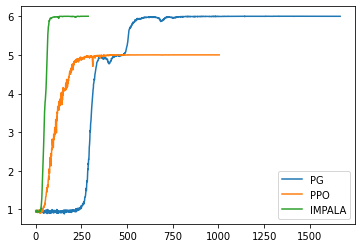

In [8]:
for label, dataframe in experiments.items():
    plt.plot(dataframe['custom_metrics/num_consolidated_mean'], label=label)
    plt.legend()
    # print(f"test_types: {row['test_types']}")
    # print(f"sample episdoe users distances: {row['sample_episode_users_distances'].tolist()}")
plt.show()

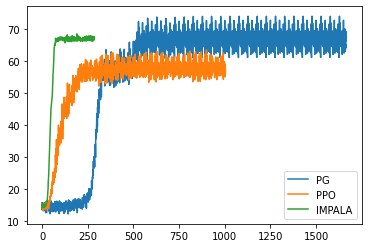

In [9]:
for label, dataframe in experiments.items():
    plt.plot(dataframe['episode_reward_mean'], label=label)
    plt.legend()
    # print(f"test_types: {row['test_types']}")
    # print(f"sample episdoe users distances: {row['sample_episode_users_distances'].tolist()}")
plt.show()

episp